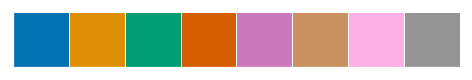

In [2]:
%matplotlib inline
import os
import sys
os.environ['PROJ_LIB']=os.path.join(os.environ['HOME'],'.anaconda3','share','proj')

import astropy.units as units
from brewer2mpl import qualitative, diverging
#import cufflinks as cf
#cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
#import h5py
#from IPython.display import HTML
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import palettable as colortable
from palettable.cartocolors.diverging import Earth_3, Tropic_3_r, Tropic_3
from palettable.colorbrewer.diverging import PuOr_3, RdBu_11
from palettable.colorbrewer.sequential import BuGn_9
from palettable.cmocean.diverging import Balance_9
import pandas as pd
import pytz
import seaborn as sns
import xarray as xr


sns.set()
fontsize = 20
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : fontsize}
mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = [15.0,10.0]
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.preamble']=r'\makeatletter \newcommand*{\rom}[1]{\expandafter\@slowromancap\romannumeral #1@} \makeatother'


pal = sns.palplot(sns.color_palette("colorblind", 8))
sns.set_style("whitegrid", {'axes.grid':True, 'ticks':True})
plt.style.use("seaborn-paper")
sns.set_context('paper')
sns.set_palette(pal)
sns.despine()
np.warnings.filterwarnings('ignore')
utc = pytz.UTC
timezone = pytz.timezone('Australia/Darwin')
paper_path = os.path.join(os.environ['HOME'], 'Work', 'Paper', '2018', 'Hector')
date_fmt = mdates.DateFormatter('%b %d')
pal

In [3]:
data_set = pd.read_pickle('../../slides/WOH_aavg.pkl')

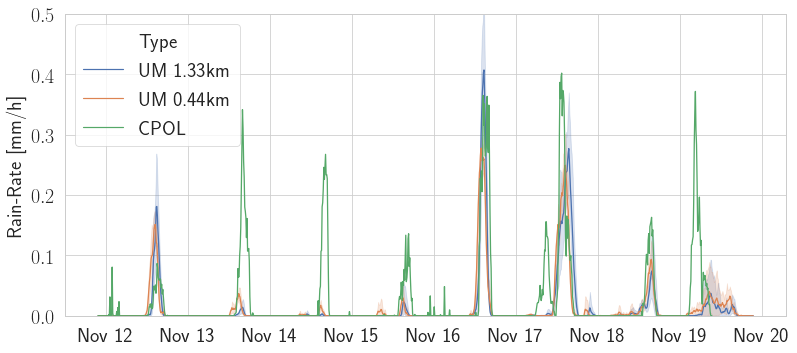

In [52]:
#Plot area avg TS

#sns.set_style("darkgrid", {'axes.grid':True, 'ticks':True})
#
#Get the minimum time period that is covered by all simulations and also observations
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(111)
sns.lineplot(x='time', y='rain-rate', hue='Type', ax=ax, data=data_set, lw=1.3)
ax.legend(loc=0, fontsize=20)
ax.tick_params(labelsize=20)
#ax.set_xlim(plot_data.time.iloc[0], plot_data.time.iloc[-1])
ax.set_ylim(-0.001,0.5)
ax.set_ylabel('Rain-Rate [mm/h]', fontsize=20)
_ = ax.xaxis.set_major_formatter(date_fmt)
_ = ax.set_xlabel('')
#_ = ax.set_title('Comparison of Area-Avg Rainfall', fontsize=fontsize)
fig.subplots_adjust(left=0.07, bottom=0.05, right=0.98, top=0.75)
fig.savefig(os.path.join(paper_path, 'Figure_03.pdf'), bbox_set_inches='tight', dpi=300)
#d3plot = mpld3.display(fig)
#display(d3plot)

In [20]:
np.unique(data_set.loc[data_set['Type'] == 'UM 1.33km'].time).size

1152

In [28]:
times = np.unique(data_set.time)
types = np.unique(data_set.Type)

2232

In [50]:
std = {}
means = {}
for ty in types[::-1]:
    sub = data_set.loc[data_set.Type == ty]
    times = np.unique(sub.time)
    mins = np.array([np.nanmin(sub.loc[sub.time == t]['rain-rate']) for t in times])
    maxs = np.array([np.nanmax(sub.loc[sub.time == t]['rain-rate']) for t in times])
    means[ty] = np.nansum([np.nanmean(sub.loc[sub.time == t]['rain-rate']) for t in times])/6
    std[ty] = np.nanmean((maxs - mins))
std

{'UM 1.33km': 0.02957726771042256,
 'UM 0.44km': 0.021598335950148498,
 'CPOL': 0.0}

In [51]:
means

{'UM 1.33km': 2.4672837805437147,
 'UM 0.44km': 2.499947043000214,
 'CPOL': 4.760144033025651}